# Visualization of fluid channel models

This notebook is designed for visualization of models of refrigerant
flowing through a microfluidic channel.

Created on Wed Mar 25 9:45:13 2020  
author: ericmuckley@gmail.com

### Import libraries

In [2]:
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# change matplotlib settings to make plots look nicer
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['ytick.major.width'] = 3

### Get model list

In [3]:
# set path of folder which contains image files
folder_path = os.path.join(os.getcwd(), 'models')
all_models = [m for m in glob(folder_path+'/*') if '.npy' in m]
print('Found {} models:'.format(len(all_models)))
for m in all_models:
    print(os.path.split(m)[1])
# get model parameters file
model_params = 

Found 10 models:
75lbh000010__model.npy
75lbh000020__model.npy
75lbh000030__model.npy
75lbh000040__model.npy
75lbh000050__model.npy
75lbh000060__model.npy
75lbh000070__model.npy
75lbh000080__model.npy
75lbh000090__model.npy
75lbh000100__model.npy


### Define some functions to use later

In [4]:
def plot_setup(labels=['X', 'Y'], fsize=18, setlimits=False,
               limits=[0,1,0,1], title='', size=None,
               legend=False, save=False, filename='plot.jpg'):
    """Creates a custom plot configuration to make graphs look nice.
    This can be called with matplotlib for setting axes labels,
    titles, axes ranges, and the font size of plot labels.
    This should be called between plt.plot() and plt.show() commands."""
    plt.xlabel(str(labels[0]), fontsize=fsize)
    plt.ylabel(str(labels[1]), fontsize=fsize)
    plt.title(title, fontsize=fsize)
    fig = plt.gcf()
    if size:
        fig.set_size_inches(size[0], size[1])
    else:
        fig.set_size_inches(10, 10)
    if legend:
        plt.legend(fontsize=fsize-4)
    if setlimits:
        plt.xlim((limits[0], limits[1]))
        plt.ylim((limits[2], limits[3]))
    if save:
        fig.savefig(filename, dpi=120, bbox_inches='tight')
        plt.tight_layout()

def plot_channel_image(image, title=None, vmin=None, vmax=None):
    """Plot image of the channel, colored by void fraction."""
    plt.imshow(image, origin='lower', cmap='jet', vmin=vmin, vmax=vmax, )
    fig = plt.gcf()
    fig.set_size_inches(11,11)
    plt.axis('off')
    if title is not None:
        plt.title(title, fontsize=16)
    plt.show()

## Read models and reconstruct simulated channels

In [5]:
def remove_axis_backgrounds(ax, grid=True):
    """Takes matplotlib 3D axis and removes colored plane backgrounds.
    Also turns on or off the gridlines in 3D plot."""
    if grid is False:
        ax.grid(b=None)
    # remove colored axes planes
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # set axis plane color to white
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


75lbh000010
temp: 10
flowrate: 75
model error (%): 5.98


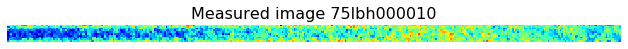

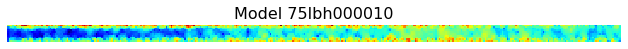


75lbh000020
temp: 20
flowrate: 75
model error (%): 6.16


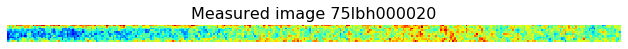

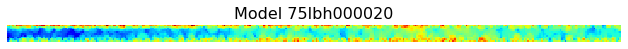


75lbh000030
temp: 30
flowrate: 75
model error (%): 5.93


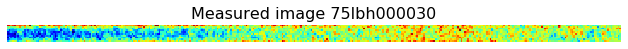

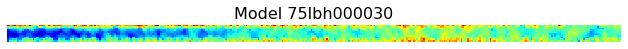


75lbh000040
temp: 40
flowrate: 75
model error (%): 5.31


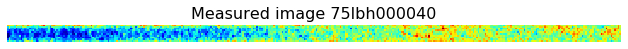

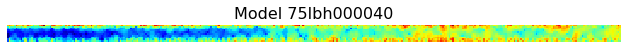


75lbh000050
temp: 50
flowrate: 75
model error (%): 5.27


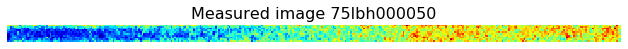

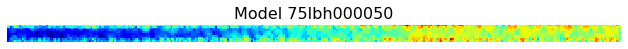


75lbh000060
temp: 60
flowrate: 75
model error (%): 5.22


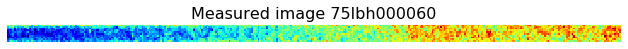

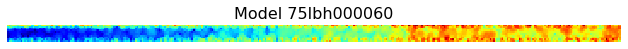


75lbh000070
temp: 70
flowrate: 75
model error (%): 4.89


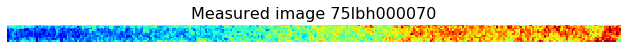

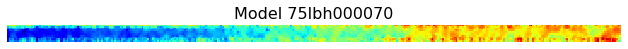


75lbh000080
temp: 80
flowrate: 75
model error (%): 4.62


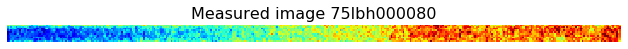

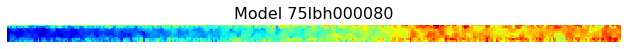


75lbh000090
temp: 90
flowrate: 75
model error (%): 4.17


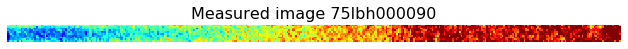

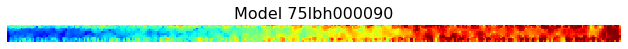


75lbh000100
temp: 100
flowrate: 75
model error (%): 3.5


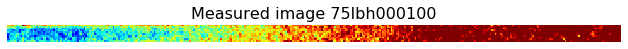

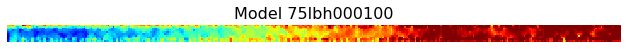

In [11]:
# load dictionary from json file

for model in all_models:
    
    m = np.load(model, allow_pickle=True)[()]
    
    r = np.array(m['rad'])
    x0 = np.array(m['cent'])[:, 0]
    y0 = np.array(m['cent'])[:, 1]
    #z0 = np.zeros_like(m['rad'])
    
    print('\n =====================================================')
    print(m['label'])
    print('temp: {}'.format(m['temp']))
    print('flowrate: {}'.format(m['flowrate']))
    print('model error (%): {}'.format(round(m['percent_error'], 2)))
    
    # plot original image and modeled image
    plot_channel_image(m['img_voidfrac'], title='Measured image '+ m['label'])
    plot_channel_image(m['img_model'], title='Model '+ m['label'])
    
    #plt.scatter(x0, y0, marker='o', s=r)
    #plot_setup(title=m['label'], labels=['X position', 'Y position'])
    #plt.show()

    
    '''

    fig = plt.figure()
    #fig.set_size_inches(12, 4)
    #fig.tight_layout()
    ax = fig.gca(projection='3d')
    #ax.set_aspect("equal")
    #ax.auto_scale_xyz([0, 500], [0, 500], [0, 100]
    u, v = np.mgrid[0:2*np.pi:5j, 0:np.pi:5j]

    for i in range(len(r)):

        # draw sphere
        x = r[i]*np.cos(u)*np.sin(v)+x0[i]
        y = r[i]*np.sin(u)*np.sin(v)+y0[i]
        z = r[i]*np.cos(v)+z0[i]
        ax.plot_surface(x, y, z, color='gray')#, alpha=0.5)
    
    # create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([x0.max()-x0.min(), y0.max()-y0.min(), z0.max()-z0.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(x0.max()+x0.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(y0.max()+y0.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(z0.max()+z0.min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')


    remove_axis_backgrounds(ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    '''


## Examine statistics of bubble distribution

In [ ]:

def reconstruct_image(sim):
    # loop over every bubble and reconstruct the image
    reconstructed_img = np.zeros_like(sim['img'])
    for i in range(len(sim['rad'])):
        cent = sim['cent'][i]
        bub_profile = get_bubble_profile(
            rad=sim['rad'][i]) / channel['d']
        reconstructed_img = add_bubble_to_grid(
            reconstructed_img,
            bub_profile,
            rad=sim['rad'][i],
            cent=sim['cent'][i])
    plot_channel_image(reconstructed_img, vmin=0, vmax=1)


def get_stats(arr):
    """Return stats of an array in dictioary form."""
    d = {'min': np.min(arr), 'max': np.max(arr),
         'mean': np.mean(arr), 'median': np.median(arr), 'std': np.std(arr)}
    return d


def simulation_report(sim):
    """Create histograms which summarize statistics of the simulation."""
    # plot histogram of bubble radii
    d = get_stats(sim['rad'])
    print('Radius statistics:')
    [print('{}: {}'.format(key, val)) for key, val in d.items()]
    plt.hist(sim['rad'], bins=60)
    plot_setup(title='Distribution of bubble radii',
            labels=['Radius (μm)', 'Frequency'], size=(5, 3))
    plt.show()

    # plot histogram of bubble center y-values
    yvals = [pair[1] for pair in sim['cent']]
    plot_setup(title='Bubble positions perpendicular to channel',
            labels=['Position (μm)', 'Frequency'], size=(5, 3))
    plt.hist(yvals, bins=60)
    plt.show()
    # plot histogram of bubble center x-values
    xvals = [pair[0] for pair in sim['cent']]
    plot_setup(title='Bubble positions parallel to channel',
            labels=['Position (μm)', 'Frequency'], size=(5, 3))
    plt.hist(xvals, bins=60)
    plt.show()

#simulation_report(sim)